### Cargar los datos

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [207]:
data = pd.read_csv("../data/yt_data.csv")

In [208]:
data["category_name"].value_counts()

Entertainment            9852
Music                    6133
Howto & Style            4101
Comedy                   3454
People & Blogs           3137
News & Politics          2483
Science & Technology     2386
Film & Animation         2340
Sports                   2166
Education                1656
Pets & Animals            920
Gaming                    786
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      48
Name: category_name, dtype: int64

### ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo? 

In [209]:
# Al ser la data leída desde otro archivo del preprocesado, convertimos trending_date a datetime 
data["trending_date"] = pd.to_datetime(data["trending_date"])

Text(0.5, 1.0, 'Cantidad de videos en tendencia a lo largo del tiempo')

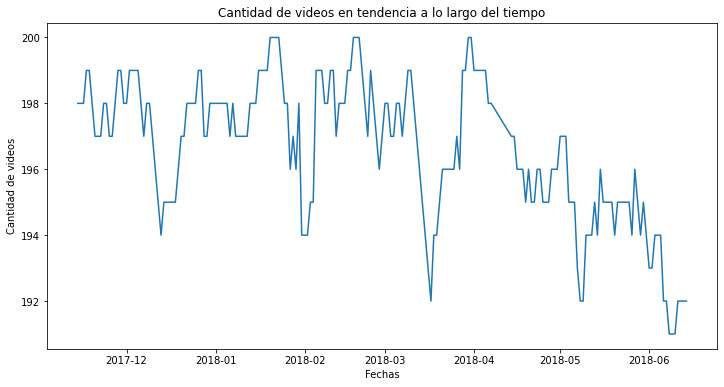

In [210]:
keys = data.groupby("trending_date").video_id.count().keys()
nums = data.groupby("trending_date").video_id.count().values

fig, ax = plt.subplots(figsize = (12,6))
ax.lines.linewidth = 10.5
ax.plot(keys, nums)
ax.set_xlabel("Fechas")
ax.set_ylabel("Cantidad de videos")
ax.set_title("Cantidad de videos en tendencia a lo largo del tiempo")


### ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

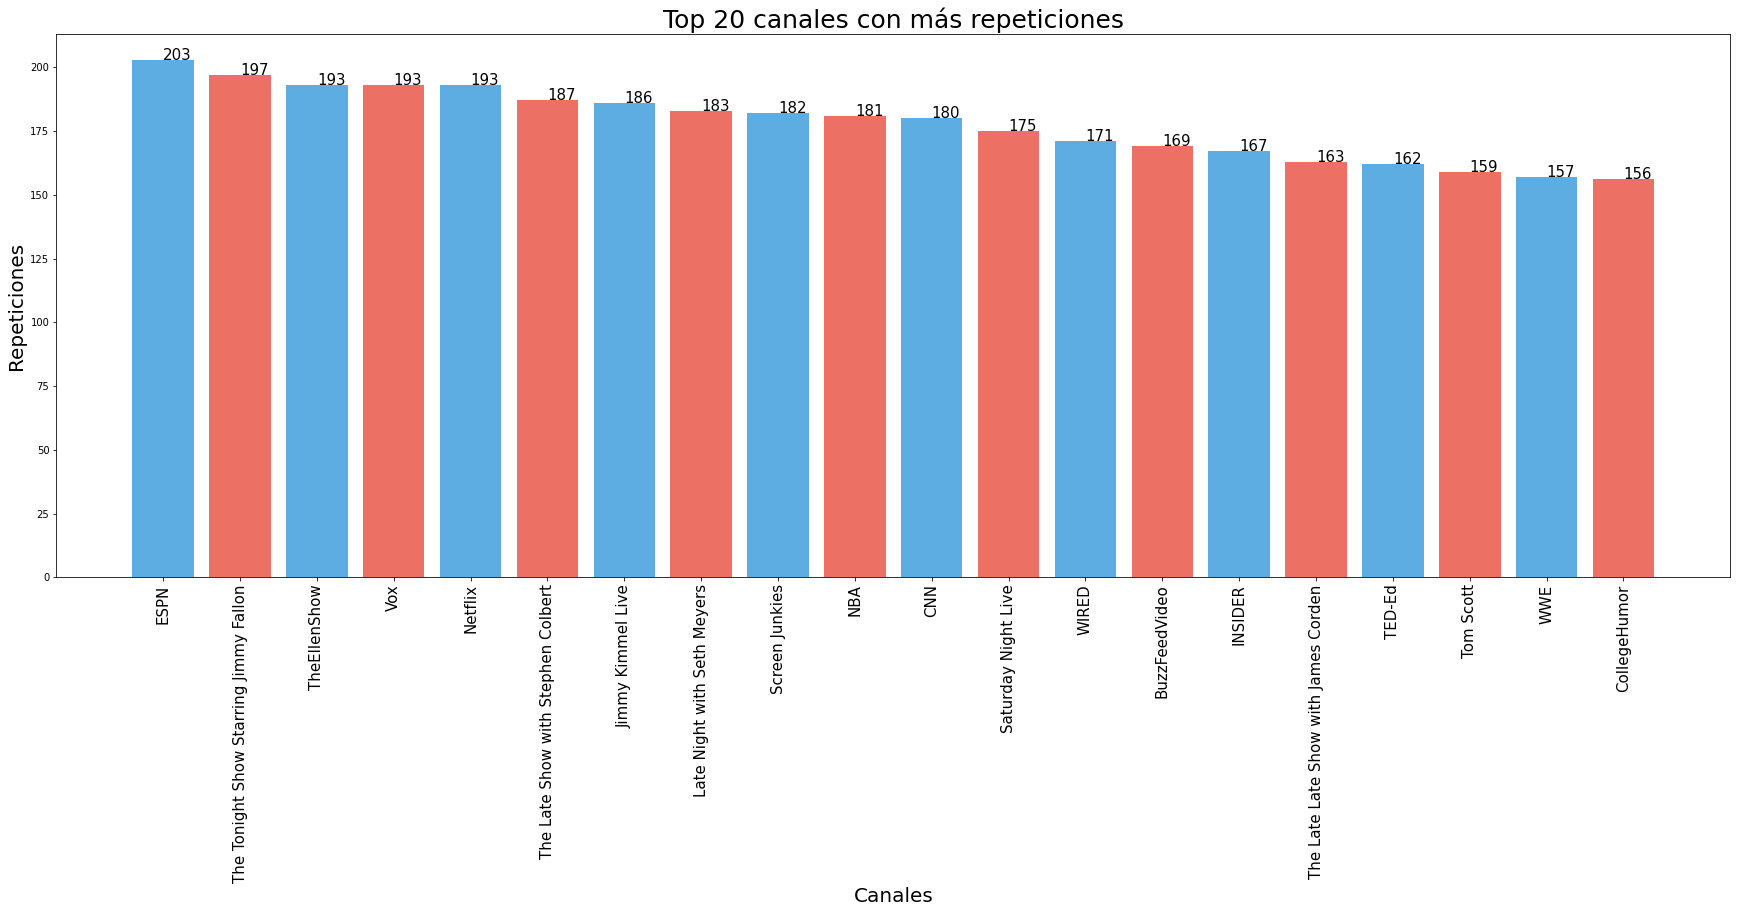

In [211]:
keys = data["channel_title"].value_counts().keys()[:20]
nums = data["channel_title"].value_counts().values[:20]

fig, ax = plt.subplots(figsize = (30,10))
ax.bar(keys, nums, color = ["#5DADE2","#EC7063"])

ax.set_xlabel("Canales", fontsize = 20)
ax.set_ylabel("Repeticiones", fontsize = 20)

ax.set_title("Top 20 canales con más repeticiones", fontsize = 25)

ax.xaxis.set_major_locator(mticker.FixedLocator(range(len(keys))))
ax.xaxis.set_major_formatter(mticker.FixedFormatter(keys))
ax.set_xticklabels(keys, rotation = 90, fontsize = 15)

for i, v in enumerate(nums):
    ax.text(i, v, str(v), color = "black", fontsize = 15)

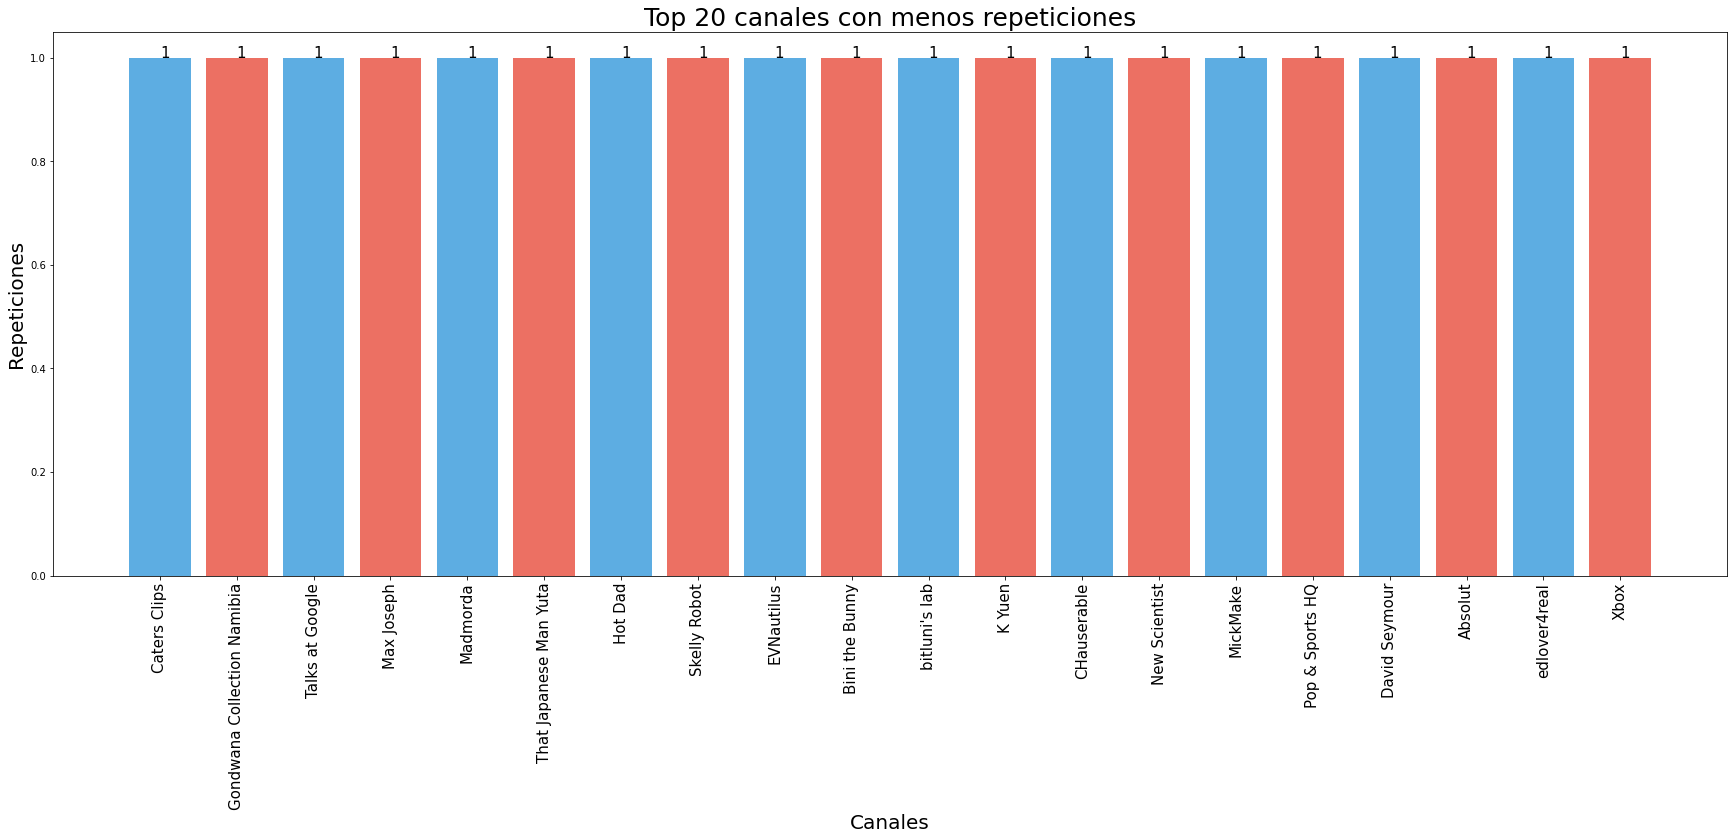

In [212]:
keys = data["channel_title"].value_counts().keys()[-20:]
nums = data["channel_title"].value_counts().values[-20:]

fig, ax = plt.subplots(figsize = (30,10))
ax.bar(keys, nums, color = ["#5DADE2","#EC7063"])

ax.set_xlabel("Canales", fontsize = 20)
ax.set_ylabel("Repeticiones", fontsize = 20)

ax.set_title("Top 20 canales con menos repeticiones", fontsize = 25)

ax.xaxis.set_major_locator(mticker.FixedLocator(range(len(keys))))
ax.xaxis.set_major_formatter(mticker.FixedFormatter(keys))
ax.set_xticklabels(keys, rotation = 90, fontsize = 15)

for i, v in enumerate(nums):
    ax.text(i, v, str(v), color = "black", fontsize = 15)